In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
def removeDuplicates(s):
    chars = []
    prev = None
 
    for c in s:
        if prev != c:
            chars.append(c)
            prev = c
 
    return ''.join(chars)
 
 
if __name__ == '__main__':
 
    s = 'AAABBCDDD'
    print(removeDuplicates(s))
 

In [6]:
def anteceAndSucess (i):
    a = int(i) - 1
    b = int(i) + 1
    return(str(a) +', '+ str(i)+', '+str(b) )


In [7]:
print(anteceAndSucess(10))

9, 10, 11


In [29]:
def most_frequent(s):
    hist = {}
    for x in s:
        hist[x] = hist.get(x, 0) + 1
    t = []
    for x, freq in hist.items():
        t.append((freq, x))
    t.sort(reverse=True)
    res = []
    for freq, x in t:
        res.append(x)
    return res

print(most_frequent('EMANUEL'))




['E', 'U', 'N', 'M', 'L', 'A']


In [30]:
import numpy as np
l = input("Informe o tamanho da linha: ")
c = input("Informe o tamanho da coluna: ")
matriz = np.random.randint(1000, size=(int(lin), int(col)))
print(aleatorios)

### Gráficos

In [25]:
print(list(0))

TypeError: 'int' object is not iterable

Principais bibliotecas:
* matplotlib
* Seaborn
* Bokeh
* Plotly

In [ ]:
iris = pd.read_csv('/Users/anamees/Desktop/IRIS.csv')
iris

In [ ]:
iris.info()

In [ ]:
iris.describe()

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

sns.FacetGrid(iris,hue="species").map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(iris,hue="species").map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(iris,hue="species").map(sns.distplot,"sepal_length").add_legend()
plt.show()

In [ ]:
sns.boxplot(x="species",y="petal_length",data=iris)
plt.show()

In [ ]:
sns.distplot(iris['petal_length'])

sns.displot(x = 'year', [500, 1000, 1500, 2000, 2500, 3000], ntrans)

In [ ]:
#kind = 'hex', hue='species', kind = 'reg',  kind = 'kde'
sns.jointplot(x = 'petal_length', y = 'petal_width', data = iris)

In [ ]:
sns.scatterplot(x='sepal_length', y='sepal_width',
                hue='species', data=iris)
sns.rugplot(data=iris, x="sepal_length", y="sepal_width")
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xlabel('Tamanho da pétala', fontdict=None, labelpad=None)
plt.show()

In [ ]:
sns.kdeplot(data=iris, x="sepal_length")
sns.rugplot(data=iris, x="sepal_length")

In [ ]:
sns.pairplot(iris,hue="species",size=3);
plt.show()

In [ ]:
g = sns.PairGrid(iris,hue="species")
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [ ]:
sns.countplot(x='species', data=iris)
plt.show()

In [ ]:
sns.heatmap(iris.corr(method='pearson'), annot = True);
plt.show()

In [ ]:
diamonds = sns.load_dataset("diamonds")
sns.scatterplot(data=diamonds, x="carat", y="price", s=5)
sns.rugplot(data=diamonds, x="carat", y="price", lw=1, alpha=.005)

Várias opções: https://www.python-graph-gallery.com

### Geolocalização

In [ ]:
import pandas as pd
hoteis = pd.read_csv('/Users/anamees/Desktop/Hotel_Reviews.csv')
hoteis = hoteis.drop(['Additional_Number_of_Scoring','Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Tags', 'lat', 'lng'], axis=1)
hoteis = hoteis.iloc[[10,500,2300,3200, 4000, 5300]]
hoteis

In [ ]:
# Calcular latitudes e longitudes dos hoteis
hoteis['Latitude'] = 0
hoteis['Longitude'] = 0

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='your unique UA')
for n in range(len(hoteis)):
    try:
        location = geolocator.geocode(hoteis['Hotel_Address'].iloc[n])
        hoteis['Latitude'].iloc[n] = location.latitude
        hoteis['Longitude'].iloc[n] = location.longitude
    except:
        pass

In [ ]:
hoteis

In [ ]:
import numpy as np
hoteis = hoteis.replace(0, np.nan)
hoteis = hoteis.dropna(how='any', axis=0)
hoteis

In [ ]:
import pyproj
import math

def lonlat_to_xy(lon, lat):
    proj_latlon = pyproj.Proj(proj='latlong')
    proj_xy = pyproj.Proj(proj='utm',zone=3)
    xy = pyproj.transform(proj_latlon, proj_xy, lon, lat)
    return xy[0], xy[1]

### Mapas

In [ ]:
import folium

mapa = folium.Map([hoteis['Latitude'].median(),hoteis['Longitude'].median()],zoom_start=12, tiles= 'OpenStreetMap')
folium.TileLayer('stamentoner').add_to(mapa)
legenda = folium.FeatureGroup(name='Hoteis considerados', col='orange')
mapa.add_child(legenda)
folium.map.LayerControl('topleft', collapsed= False).add_to(mapa)

for index,row in hoteis.iterrows():
    folium.Marker([row['Latitude'],row['Longitude']],popup = row['Hotel_Name'], radius=1, color='blue').add_to(mapa)

mapa 

### Bibliotecas famosas: Altair, Bokeh, Folium e Plotly

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Scattergeo())
fig.update_geos(
    resolution=50,
    showcoastlines=True, coastlinecolor="Purple",
    showland=False, landcolor="LightGreen",
    showocean=True, oceancolor="LightBlue",
    showlakes=True, lakecolor="Blue",
    showrivers=False, rivercolor="Blue"
)
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
hoteis = pd.read_csv('/Users/anamees/Desktop/Hotel_Reviews.csv')
hoteis = hoteis.drop(['Additional_Number_of_Scoring','Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Tags', 'lat', 'lng'], axis=1)

Reviewer_Nat_Count = hoteis.Reviewer_Nationality.value_counts()
print(Reviewer_Nat_Count[:10])

In [ ]:
Review_Date_count = hoteis.Review_Date.value_counts()
Review_Date_count[:10].plot(kind='bar')

* ‘line’ : line plot (default)
* ‘bar’ : vertical bar plot
* ‘barh’ : horizontal bar plot
* ‘hist’ : histogram
* ‘box’ : boxplot
* ‘kde’ : Kernel Density Estimation plot
* ‘density’ : same as ‘kde’
* ‘area’ : area plot
* ‘pie’ : pie plot
* ‘scatter’ : scatter plot
* ‘hexbin’ : hexbin plot

In [ ]:
# Dois gráficos no mesmo plot
import matplotlib.pyplot as plt
from pandas import read_excel

plt.plot(df['A'], df['B'], linestyle='--', marker='o', color = 'blue', markersize = 4)
plt.plot(df['A'], df['D'], linestyle='--', marker='o', color = 'red', markersize = 4)

plt.xlabel('Tempo(minuto)', fontsize=15)
plt.ylabel('Temperatura °C', fontsize=15)
plt.title('Perfil de temperatura do forno')
plt.legend(['Perfil de temperatura do forno','Perfil de temperatura do forno'], fontsize=14)

plt.figure(figsize=(10.5, 9))
plt.show()

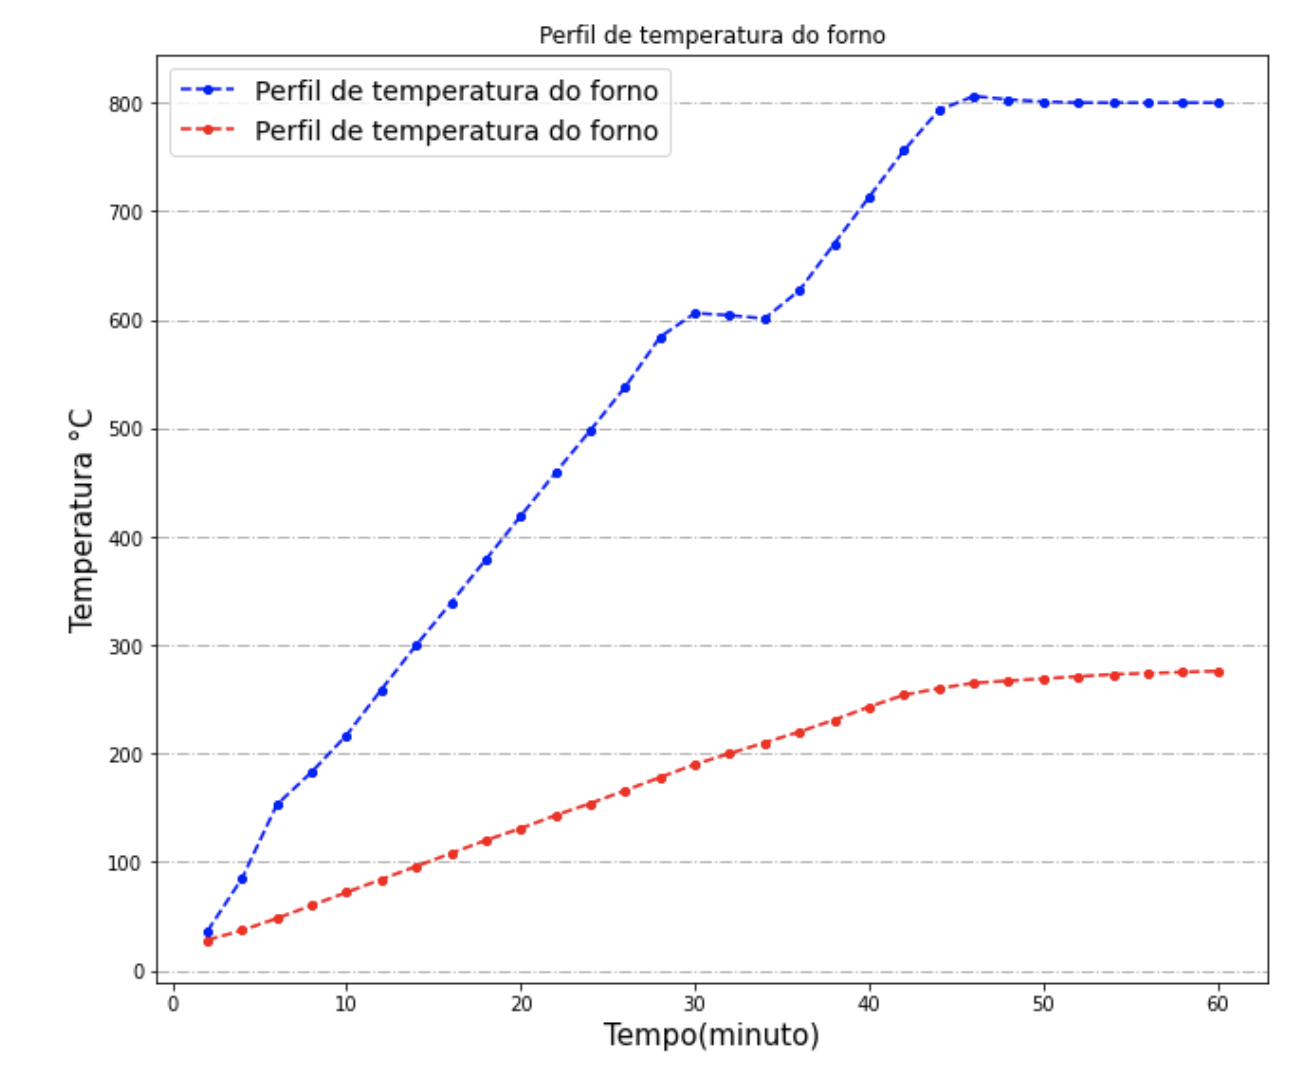

### Funções

In [ ]:
def calcular_pagamento(qtd_horas, valor_hora):
    horas = float(qtd_horas)
    taxa = float(valor_hora)
    if horas <= 40:
        total=horas*taxa
    else:
        extra = horas - 40
        total = 40*taxa+(extra*(1.5*taxa))
    return total

In [ ]:
total = calcular_pagamento(20, 50)
print('O valor total é R$',total)

O Python já tem muitas funções prontas! 
Documentação: https://docs.python.org/3/library/functions.html

### Recursão

In [ ]:
def fatorial(numero):
    if numero == 1:
        return 1
    
    return numero * fatorial(numero - 1)

In [ ]:
fatorial(5)

In [ ]:
def fatorial_sem_base(numero):
    return numero * fatorial_sem_base(numero - 1)

In [ ]:
fatorial_sem_base(5)

In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Clique aqui para ver as respostas"></form>''')

### Prática: Fibonacci
0, 1, 1, 2, 3, 5, 8, 13, 21, 34

Fn = Fn-1 + Fn-2

F0 = 0 and F1 = 1

In [ ]:
def fib(n) :
    if n==0 :
        return 0
    elif n ==1 :
        return 1
    else :
        return fib(n-1) +fib(n-2)

### Prática: Divisor máximo comum de dois números

In [ ]:

def GCD(a, b):
    low = min(a, b)
    high = max(a, b)

    if low == 0:
        return high
    elif low == 1:
        return 1
    else:
        return GCD(low, high%low)

### Desafio: triângulo de Pascal
Bordas como 1, números como soma dos dois acima

In [ ]:
def pascal(n):
    if n == 1:
        return [1]
    else:
        line = [1]
        previous_line = pascal(n-1)
        for i in range(len(previous_line)-1):
            line.append(previous_line[i] + previous_line[i+1])
        line += [1]
    return line

#print(pascal(1))
#print(pascal(2))
#print(pascal(3))
#print(pascal(4))

### Desafio: Merge sort

In [ ]:
!pip install sklearn

In [ ]:
a = int(input('Primeiro Lado'))
b = int(input('Segundo Lado'))
c = int(input('Terceiro Lado'))
if((a+b>c) | (a+c>b) | (b+c>a)):
    if(a==b & b==c):
        print('Triângulo Equilátero')
    elif((a==b) | (a==c) | (c==b)):
        print('Triângulo Isósceles')
    elif(a!=b & b!=c & c!=a):
        print('Triângulo Escaleno')
else:
    print('Não é possível formar um tringulo com as medidas passsadas')    

In [ ]:
a = int(input('valor'))
print(a-1, a, a+1)